In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_house=pd.read_csv('./DATA/kc_house_data.csv')

In [3]:
df_house.isnull().sum().any()

False

In [4]:
# df_house.describe().transpose()

<Figure size 1000x600 with 0 Axes>

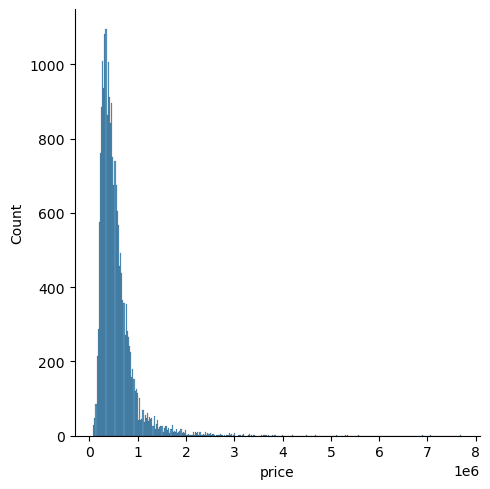

In [5]:
plt.figure(figsize=(10,6))
sns.displot(data=df_house,x=df_house['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

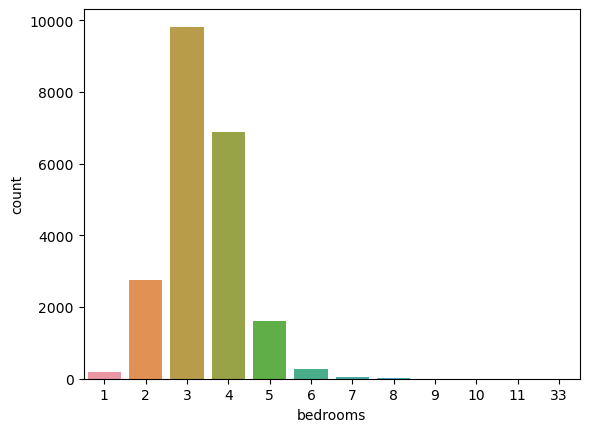

In [6]:
sns.countplot(data=df_house,x=df_house['bedrooms'])


In [7]:
# df_house=df_house.drop('date',axis=1)
df_house.corr()['price'].sort_values()

ValueError: could not convert string to float: '10/13/2014'

<Axes: xlabel='price', ylabel='sqft_living'>

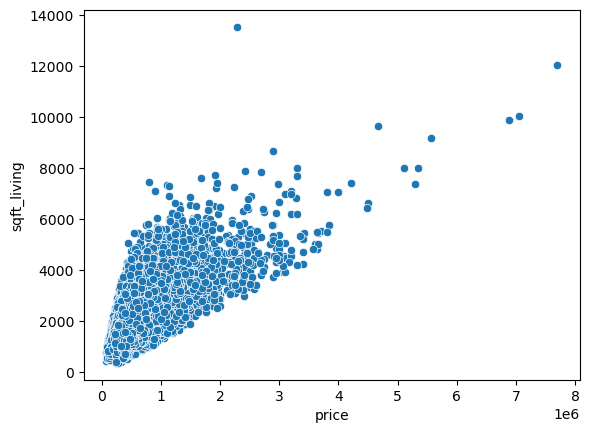

In [8]:
sns.scatterplot(x='price',y='sqft_living',data=df_house)

In [9]:
df_house['price'].max()

7700000.0

<Axes: xlabel='bedrooms', ylabel='price'>

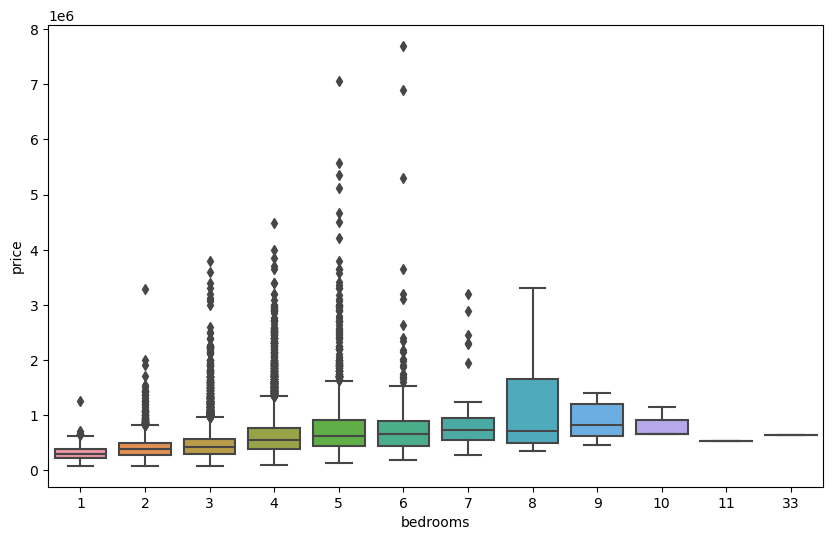

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df_house)

In [11]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

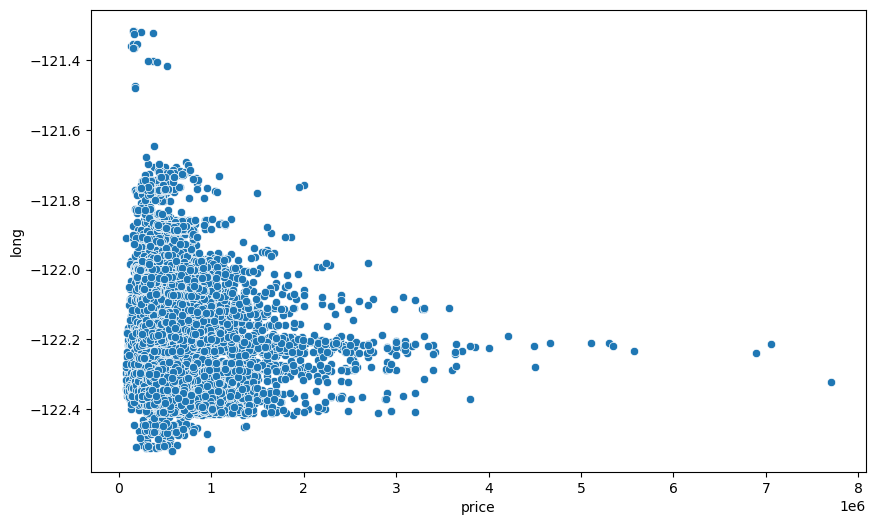

In [12]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df_house)

# Handling outliers

In [13]:
df_house.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
# Only 1% of the houses cost over 3 mil. thus well drop them
# Get number of houses
# Calculate the 1%
len(df_house['price'])*0.01

215.97

In [15]:
# Create a new df excluding the top 1%

non_top_1_perc=df_house.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

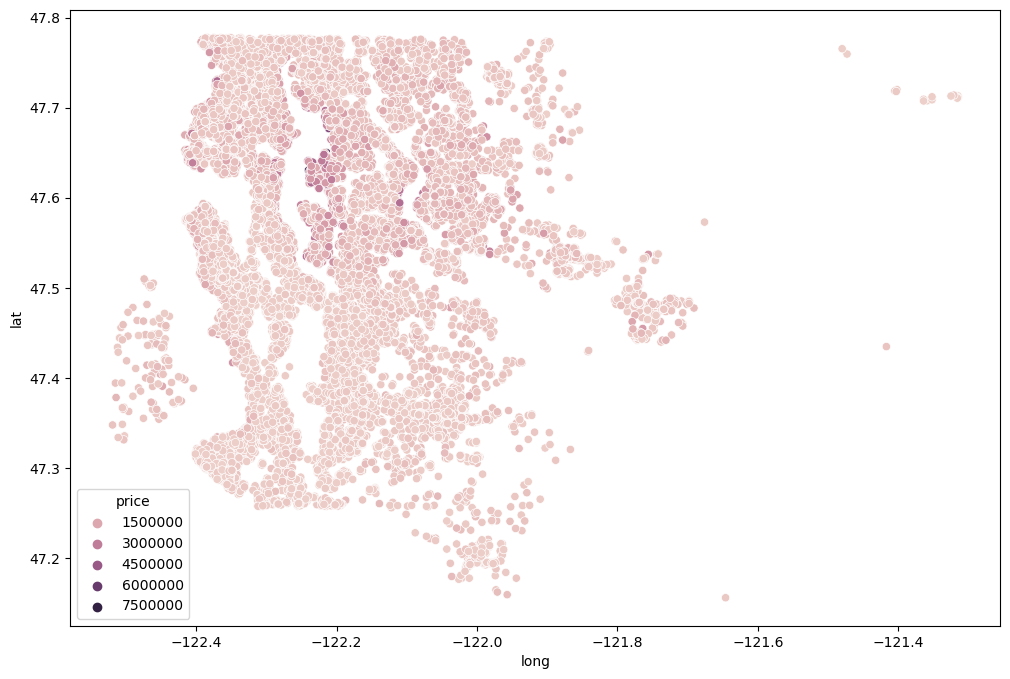

In [16]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat',data=df_house,hue='price')

<Axes: xlabel='long', ylabel='lat'>

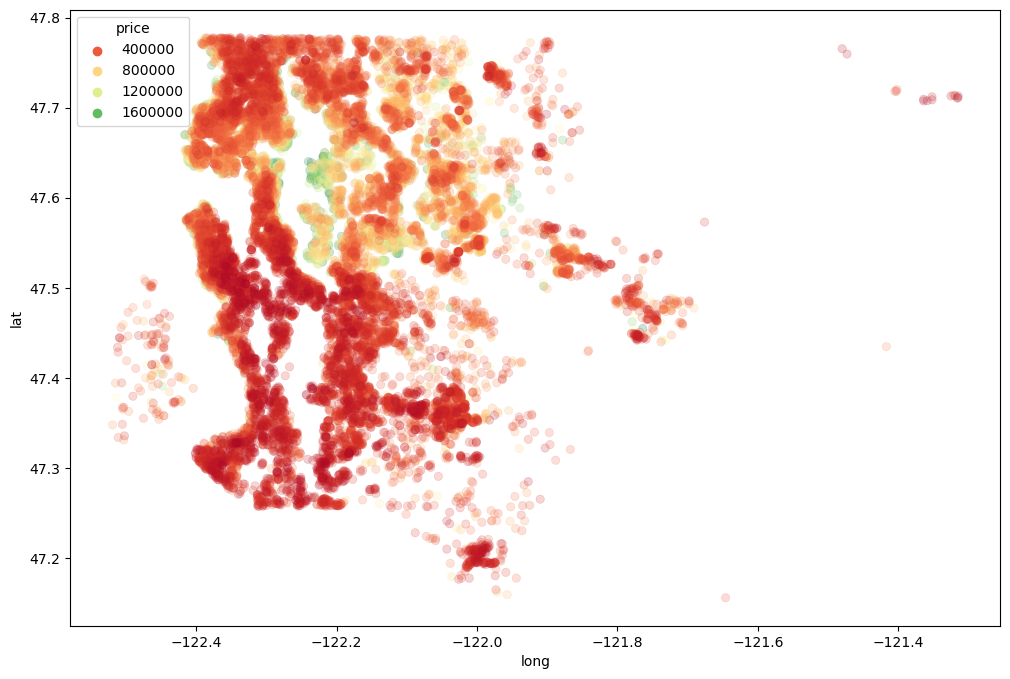

In [17]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat',data=non_top_1_perc,edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

<Axes: xlabel='waterfront', ylabel='price'>

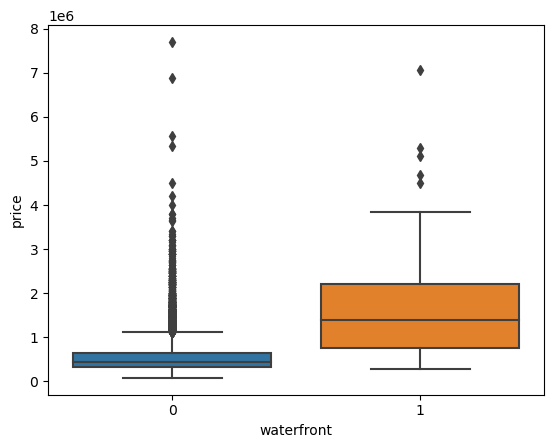

In [18]:
sns.boxplot(x='waterfront',y='price',data=df_house)

<Axes: xlabel='waterfront', ylabel='price'>

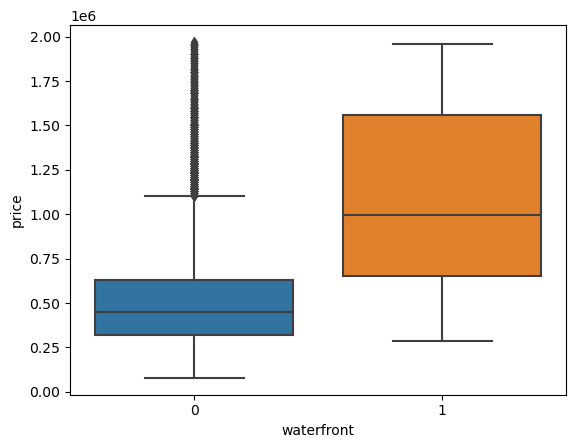

In [19]:
sns.boxplot(x='waterfront',y='price',data=non_top_1_perc)

In [20]:
df_house=df_house.drop('id',axis=1)
df_house['date']=pd.to_datetime(df_house['date'])
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df_house['year']=df_house['date'].apply(lambda date:date.year)
df_house['month']=df_house['date'].apply(lambda date:date.month)

In [22]:
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

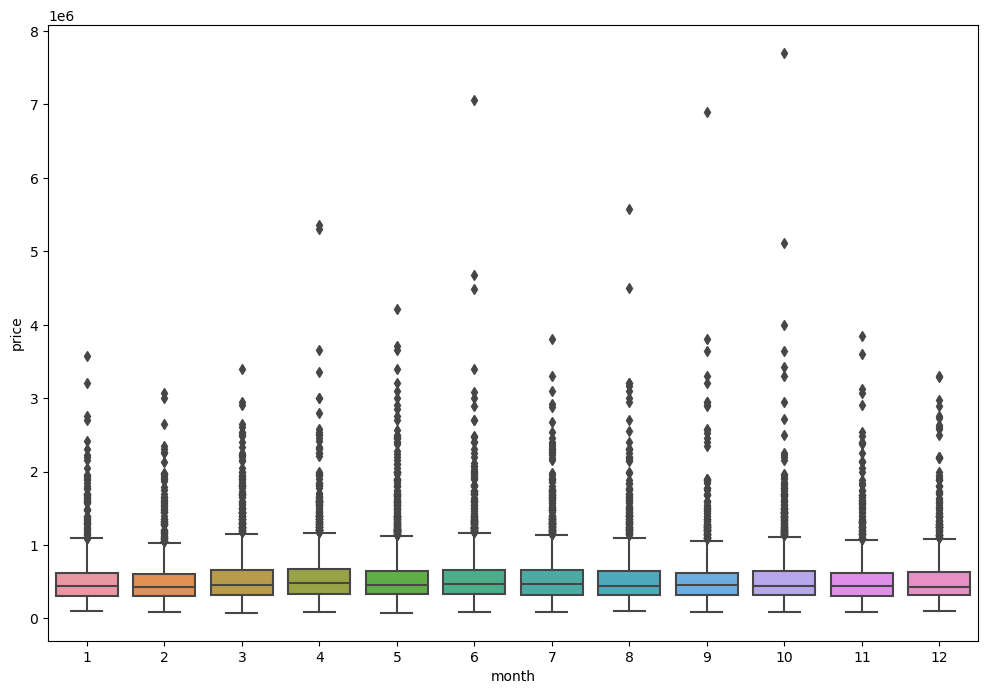

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df_house)

<Axes: xlabel='month'>

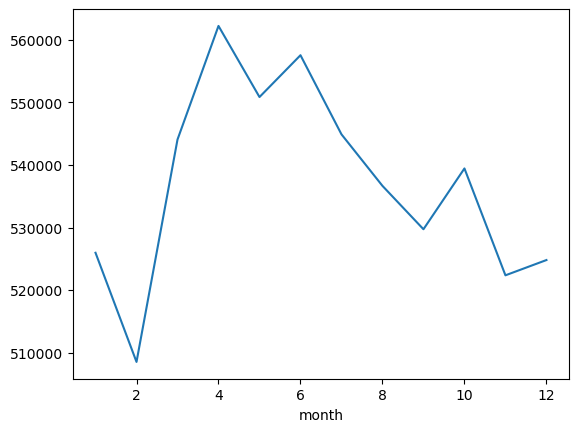

In [24]:
df_house.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

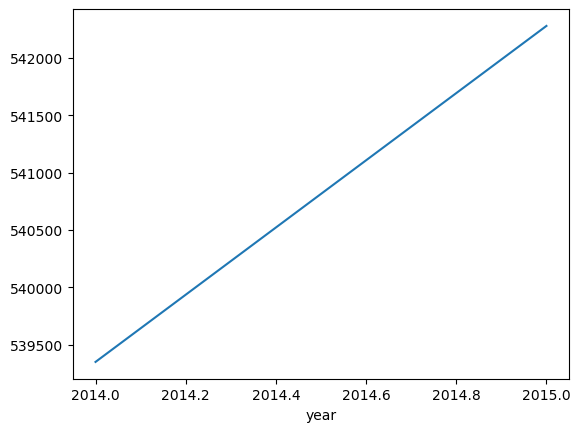

In [25]:
df_house.groupby('year').mean()['price'].plot()

In [26]:
df_house=df_house.drop('date',axis=1)

In [27]:
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [28]:
df_house=df_house.drop('zipcode',axis=1)

In [29]:
df_house['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [30]:
X=df_house.drop('price',axis=1).values
y=df_house['price'].values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
scaler=MinMaxScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [37]:
X_train.shape

(15117, 19)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam',loss='mse')

In [41]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 1ms/step - loss: 430235418624.0000 - val_loss: 418874523648.0000
Epoch 2/400
119/119 [==============================] - 0s 978us/step - loss: 428170379264.0000 - val_loss: 411410595840.0000
Epoch 3/400
119/119 [==============================] - 0s 972us/step - loss: 397713604608.0000 - val_loss: 342975905792.0000
Epoch 4/400
119/119 [==============================] - 0s 960us/step - loss: 268524191744.0000 - val_loss: 165603966976.0000
Epoch 5/400
119/119 [==============================] - 0s 943us/step - loss: 121457786880.0000 - val_loss: 96531079168.0000
Epoch 6/400
119/119 [==============================] - 0s 972us/step - loss: 98600755200.0000 - val_loss: 94408646656.0000
Epoch 7/400
119/119 [==============================] - 0s 975us/step - loss: 96574431232.0000 - val_loss: 92594659328.0000
Epoch 8/400
119/119 [==============================] - 0s 945us/step - loss: 94735269888.0000 - val_loss: 90839646208.0000
Epoch 9/4

In [42]:
losses=pd.DataFrame(model.history.history)

<Axes: >

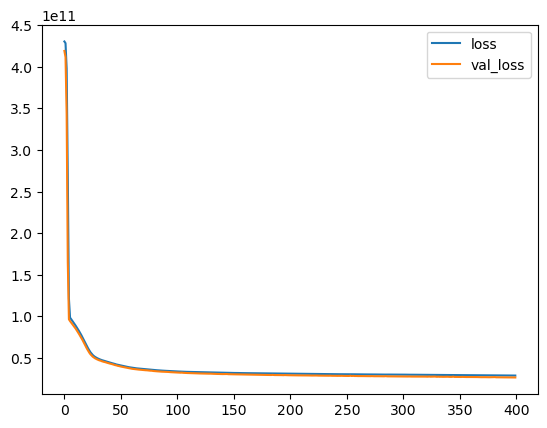

In [43]:
losses.plot()

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
preds=model.predict(X_test)
np.sqrt(mean_squared_error(y_test,preds))

203/203 [==============================] - 0s 340us/step


163374.1109283415

In [49]:
mean_absolute_error(y_test,preds)

100894.51746238426

In [50]:
explained_variance_score(y_test,preds)

0.7987650236347286

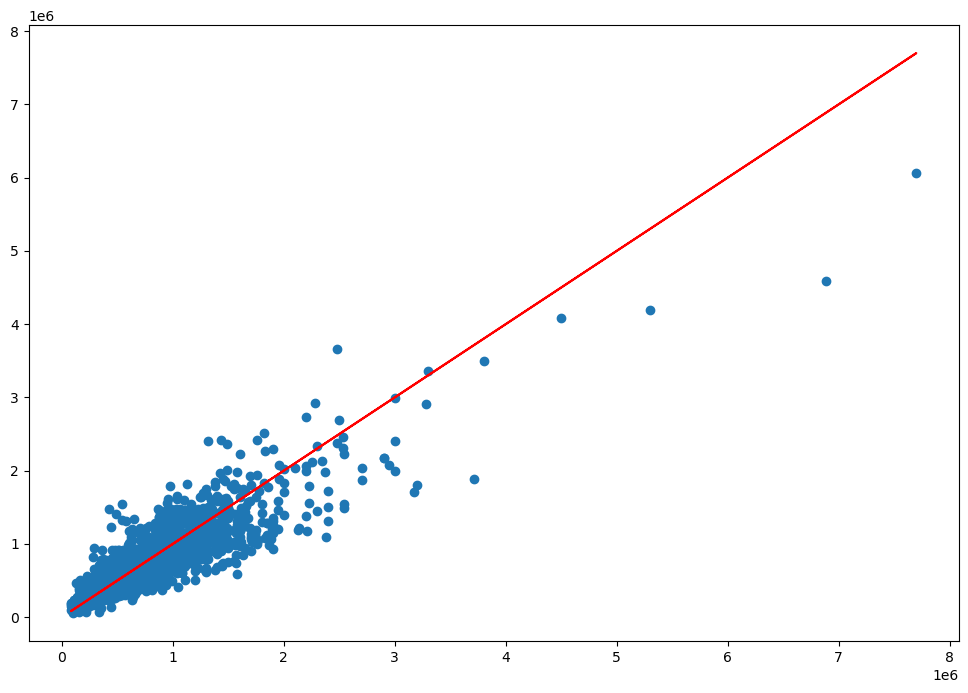

In [56]:
plt.figure(figsize=(12,8))

plt.scatter(y_test,preds)
plt.plot(y_test,y_test,'r')

In [57]:
# Train on a new dataset/feature
singe_house=df_house.drop('price',axis=1).iloc[0]

In [62]:
singe_house=scaler.transform(singe_house.values.reshape(-1,19)) # -1 means Keep ald dimensions along that axis

In [63]:
model.predict(singe_house)

1/1 [==============================] - 0s 11ms/step


array([[278519.72]], dtype=float32)

In [65]:
df_house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# Drop top 1% to see if the predictions will be great(return accurate predictions)